# Prediksi Predikat Lulus

## Drive - Colab

In [1]:
from google.colab import drive
from google.colab import files

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/ai_contest/Kelulusan/olah

/content/drive/MyDrive/ai_contest/Kelulusan/olah


## Import Modules 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## D3 

In [5]:
df = pd.read_csv('new_lulus_diploma.csv')

In [6]:
df_ori = df.copy()

In [7]:
df.head()

,IP1,IP2,IP3,IP4,IP5,IP6,Average,Predikat
0,3.36,2.11,3.09,3.34,2.59,2.56,2.84,Sangat Memuaskan
1,3.61,3.66,3.61,3.90,3.84,3.89,3.75,Cumlaude
2,3.63,3.95,3.76,3.84,3.76,3.78,3.79,Cumlaude
3,3.51,3.62,3.98,3.77,3.65,3.61,3.69,Cumlaude
4,3.98,3.83,3.64,3.96,3.94,3.89,3.87,Cumlaude


In [8]:
df.Predikat.value_counts()

Sangat Memuaskan    3974
Memuaskan           3609
Cumlaude            1666
Tidak Lulus          751
Name: Predikat, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IP1       10000 non-null  float64
 1   IP2       10000 non-null  float64
 2   IP3       10000 non-null  float64
 3   IP4       10000 non-null  float64
 4   IP5       10000 non-null  float64
 5   IP6       10000 non-null  float64
 6   Average   10000 non-null  float64
 7   Predikat  10000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


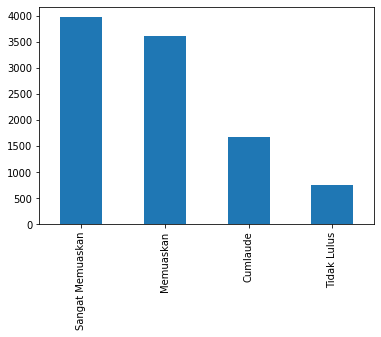

In [10]:
df['Predikat'].value_counts().plot(kind='bar')

## Semester 5

In [11]:
df_new = df.drop(['IP6'], axis=1)

In [12]:
# Backup
df_new.to_csv('nilai_diploma_5_semester.csv', index=False)

### Label Encoding

In [13]:
df = pd.read_csv('nilai_diploma_5_semester.csv', index_col=None)

In [14]:
df.head()

,IP1,IP2,IP3,IP4,IP5,Average,Predikat
0,3.36,2.11,3.09,3.34,2.59,2.84,Sangat Memuaskan
1,3.61,3.66,3.61,3.90,3.84,3.75,Cumlaude
2,3.63,3.95,3.76,3.84,3.76,3.79,Cumlaude
3,3.51,3.62,3.98,3.77,3.65,3.69,Cumlaude
4,3.98,3.83,3.64,3.96,3.94,3.87,Cumlaude


In [15]:
df.Predikat.unique()

array(['Sangat Memuaskan', 'Cumlaude', 'Memuaskan', 'Tidak Lulus'],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Predikat'] = le.fit_transform(df['Predikat'])
df.head()

,IP1,IP2,IP3,IP4,IP5,Average,Predikat
0,3.36,2.11,3.09,3.34,2.59,2.84,2
1,3.61,3.66,3.61,3.90,3.84,3.75,0
2,3.63,3.95,3.76,3.84,3.76,3.79,0
3,3.51,3.62,3.98,3.77,3.65,3.69,0
4,3.98,3.83,3.64,3.96,3.94,3.87,0


In [17]:
df.Predikat.unique()

array([2, 0, 1, 3])

Keterangan:
* Cumlaude: 0
* Memuaskan: 1
* Sangat Memuaskan: 2
* Tidak Lulus: 3

In [18]:
df.Predikat.value_counts()

2    3974
1    3609
0    1666
3     751
Name: Predikat, dtype: int64

### Predict

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(['Average', 'Predikat'], axis=1)
y = df['Predikat']

In [21]:
X

,IP1,IP2,IP3,IP4,IP5
0,3.36,2.11,3.09,3.34,2.59
1,3.61,3.66,3.61,3.90,3.84
2,3.63,3.95,3.76,3.84,3.76
3,3.51,3.62,3.98,3.77,3.65
4,3.98,3.83,3.64,3.96,3.94
...,...,...,...,...,...
9995,2.54,3.69,2.20,3.20,1.46
9996,3.78,1.80,0.19,1.97,0.24
9997,1.73,3.22,0.20,0.07,1.61
9998,3.46,2.06,0.71,3.78,0.24


In [22]:
y

0       2
1       0
2       0
3       0
4       0
       ..
9995    1
9996    3
9997    3
9998    1
9999    3
Name: Predikat, Length: 10000, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

### SVM

In [24]:
from sklearn.svm import SVC

svm = SVC(gamma="auto")
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred = svm.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
def test_acc(model):
  print(f"{model} score")
  print('\n')
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print('\n')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print("Accuracy Score:")
  print(accuracy_score(y_test, y_pred))

In [28]:
test_acc(svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       334
           1       0.84      0.86      0.85       699
           2       0.89      0.93      0.91       821
           3       0.83      0.60      0.70       146

    accuracy                           0.88      2000
   macro avg       0.89      0.84      0.86      2000
weighted avg       0.88      0.88      0.88      2000



Confusion Matrix:
[[320   0  14   0]
 [  0 599  82  18]
 [  5  56 760   0]
 [  0  58   0  88]]


Accuracy Score:
0.8835


### Export Semester 5

In [29]:
import pickle

In [30]:
pickle.dump(svm, open("Semester5.pkl", 'wb'))

In [31]:
del svm

In [32]:
model = pickle.load(open("Semester5.pkl", "rb"))

In [33]:
y_example = model.predict([[3.9, 3.6, 3.7, 3.6, 3.5]])
y_example

array([0])

## Semester 4

In [34]:
df = df_ori.copy()

In [35]:
df_new = df.drop(['IP5', 'IP6'], axis=1)

In [36]:
# Backup
df_new.to_csv('nilai_diploma_4_semester.csv', index=False)

### Label Encoding

In [37]:
df = pd.read_csv('nilai_diploma_4_semester.csv', index_col=None)

In [38]:
df.head()

,IP1,IP2,IP3,IP4,Average,Predikat
0,3.36,2.11,3.09,3.34,2.84,Sangat Memuaskan
1,3.61,3.66,3.61,3.90,3.75,Cumlaude
2,3.63,3.95,3.76,3.84,3.79,Cumlaude
3,3.51,3.62,3.98,3.77,3.69,Cumlaude
4,3.98,3.83,3.64,3.96,3.87,Cumlaude


In [39]:
df.Predikat.unique()

array(['Sangat Memuaskan', 'Cumlaude', 'Memuaskan', 'Tidak Lulus'],
      dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Predikat'] = le.fit_transform(df['Predikat'])
df.head()

,IP1,IP2,IP3,IP4,Average,Predikat
0,3.36,2.11,3.09,3.34,2.84,2
1,3.61,3.66,3.61,3.90,3.75,0
2,3.63,3.95,3.76,3.84,3.79,0
3,3.51,3.62,3.98,3.77,3.69,0
4,3.98,3.83,3.64,3.96,3.87,0


In [41]:
df.Predikat.unique()

array([2, 0, 1, 3])

Keterangan:
* Cumlaude: 0
* Memuaskan: 1
* Sangat Memuaskan: 2
* Tidak Lulus: 3

In [42]:
df.Predikat.value_counts()

2    3974
1    3609
0    1666
3     751
Name: Predikat, dtype: int64

### Predict

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(['Average', 'Predikat'], axis=1)
y = df['Predikat']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

### SVM

In [46]:
from sklearn.svm import SVC

svm = SVC(gamma="auto")
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_pred = svm.predict(X_test)

In [48]:
test_acc(svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       334
           1       0.77      0.79      0.78       699
           2       0.84      0.88      0.86       821
           3       0.77      0.46      0.58       146

    accuracy                           0.83      2000
   macro avg       0.83      0.77      0.79      2000
weighted avg       0.83      0.83      0.83      2000



Confusion Matrix:
[[320   0  14   0]
 [  0 554 125  20]
 [ 13  88 720   0]
 [  0  79   0  67]]


Accuracy Score:
0.8305


### Export Semester 4

In [49]:
pickle.dump(svm, open("Semester4.pkl", 'wb'))

In [50]:
del svm

In [51]:
model = pickle.load(open("Semester4.pkl", "rb"))

In [52]:
y_example = model.predict([[3.9, 3.6, 3.5, 3.6]])
y_example

array([0])

## Semester 3

In [53]:
df = df_ori.copy()

In [54]:
df_new = df.drop(['IP4', 'IP5', 'IP6'], axis=1)

In [55]:
# Backup
df_new.to_csv('nilai_diploma_3_semester.csv', index=False)

### Label Encoding

In [56]:
df = pd.read_csv('nilai_diploma_3_semester.csv', index_col=None)

In [57]:
df.head()

,IP1,IP2,IP3,Average,Predikat
0,3.36,2.11,3.09,2.84,Sangat Memuaskan
1,3.61,3.66,3.61,3.75,Cumlaude
2,3.63,3.95,3.76,3.79,Cumlaude
3,3.51,3.62,3.98,3.69,Cumlaude
4,3.98,3.83,3.64,3.87,Cumlaude


In [58]:
df.Predikat.unique()

array(['Sangat Memuaskan', 'Cumlaude', 'Memuaskan', 'Tidak Lulus'],
      dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Predikat'] = le.fit_transform(df['Predikat'])
df.head()

,IP1,IP2,IP3,Average,Predikat
0,3.36,2.11,3.09,2.84,2
1,3.61,3.66,3.61,3.75,0
2,3.63,3.95,3.76,3.79,0
3,3.51,3.62,3.98,3.69,0
4,3.98,3.83,3.64,3.87,0


In [60]:
df.Predikat.unique()

array([2, 0, 1, 3])

Keterangan:
* Cumlaude: 0
* Memuaskan: 1
* Sangat Memuaskan: 2
* Tidak Lulus: 3

In [61]:
df.Predikat.value_counts()

2    3974
1    3609
0    1666
3     751
Name: Predikat, dtype: int64

### Predict

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop(['Average', 'Predikat'], axis=1)
y = df['Predikat']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

### SVM

In [65]:
from sklearn.svm import SVC

svm = SVC(gamma="auto")
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
y_pred = svm.predict(X_test)

In [67]:
test_acc(svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       334
           1       0.72      0.74      0.73       699
           2       0.78      0.84      0.81       821
           3       0.78      0.29      0.43       146

    accuracy                           0.78      2000
   macro avg       0.80      0.70      0.72      2000
weighted avg       0.78      0.78      0.77      2000



Confusion Matrix:
[[313   0  21   0]
 [  1 515 171  12]
 [ 31  97 693   0]
 [  0 103   0  43]]


Accuracy Score:
0.782


### Export Semester 3

In [68]:
pickle.dump(svm, open("Semester3.pkl", 'wb'))

In [69]:
del svm

In [70]:
model = pickle.load(open("Semester3.pkl", "rb"))

In [72]:
y_example = model.predict([[3.9, 3.6, 3.6]])
y_example

array([0])

## Catatan

Bagian ini merupakan bagian untuk membuat prediksi pada program studi diploma (D3)